In [5]:
import csv
import random
from sklearn.linear_model import LinearRegression
import pandas as pd
import unicodedata
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import os

### 1. 한글 폰트 불러오기

In [6]:
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt

font_location = "/usr/share/fonts/truetype/dejavu/NanumGothic.otf"
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

### 2. 시드값 고정

In [7]:
# Set the seed 
random.seed(42)

### 3. 그래프 그리기

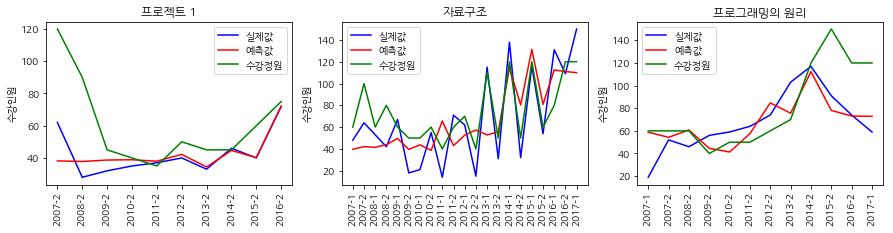

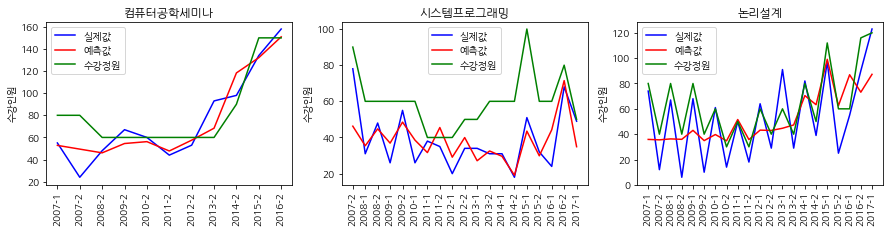

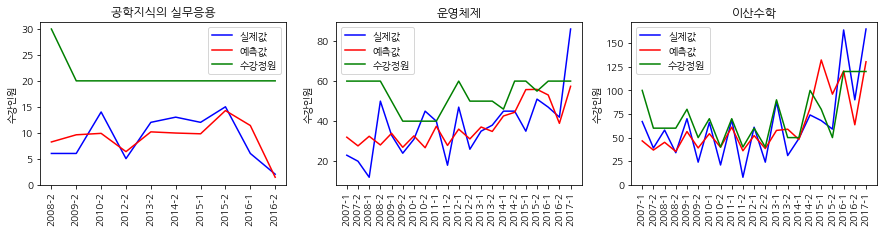

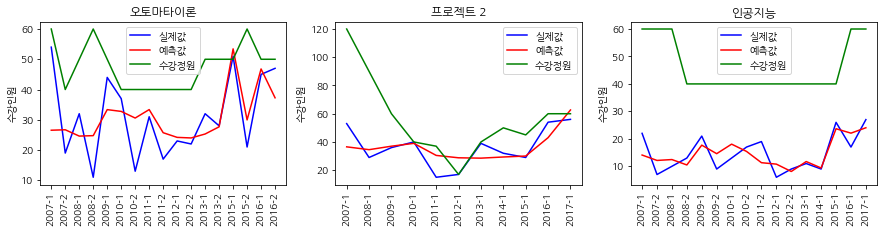

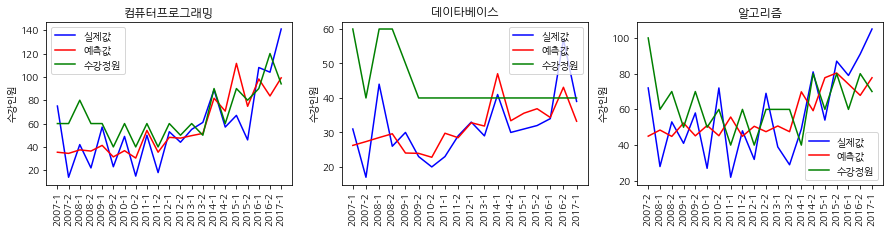

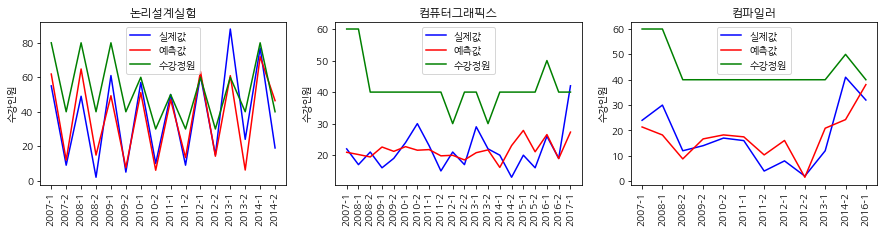

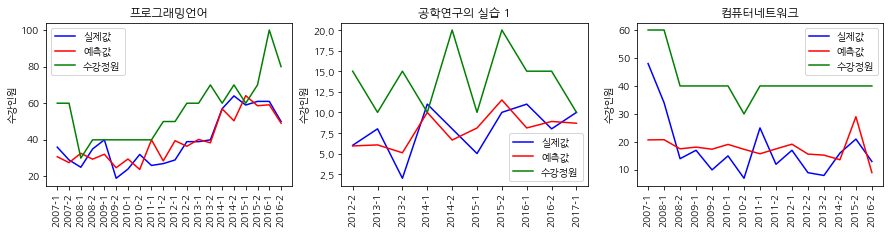

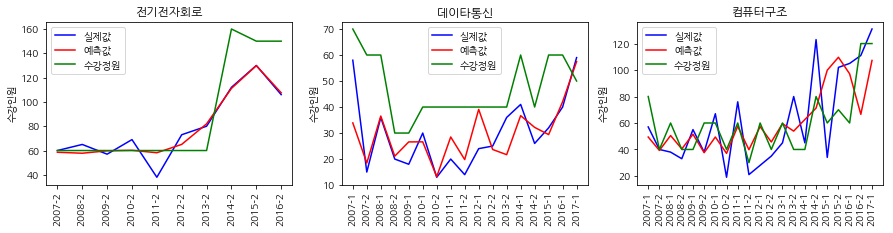

In [12]:
idx = 0
for filename in os.listdir("./lectures"):
    ### 1. 수강편람 데이터 불러오기

    CSV = pd.DataFrame.from_csv("./lectures/" + filename, header=0)

    ### 2. 충분한 데이터 확보(10학기 이상))

    if len(CSV["year"].values.tolist()) < 10:
        continue

    ### 3. 선형회귀 데이터(column) 선택

    feature_to_filter = ["required", "junior", "double", "second", "all"]

    train_dataset = CSV[feature_to_filter].values.tolist()
    train_target=CSV["enrollment"].values.tolist()
    CSV["xlabel"] = ["{0}-{1}".format(year, fall+1) for year, fall in zip(CSV["year"], CSV["fall"])]
    CSV["x"] = [year * 10 + fall for year, fall in zip(CSV["year"], CSV["fall"])]

    ### 4. 선형회귀(Linear Regression)

    model = LinearRegression(normalize=True)
    model.fit(train_dataset, train_target)

    ### 5. 결과

    result = pd.DataFrame(list(zip(feature_to_filter, model.coef_)), columns=["features", "coef"])
#     print(filename)
#     print(result.head())

    prediction = model.predict(train_dataset)

    mean_squared_error(prediction, train_target)
        
    rows = [i for i in range(len(CSV.index))]

    if idx % 3 == 2:
        plt.figure(figsize=(15,3))
    plt.subplot(1, 3, idx % 3 + 1)

    idx += 1
    q = u"{name}".format(name=filename.split(".csv")[0])
    q = unicodedata.normalize('NFC', q)
    
    plt.plot(rows, train_target, 'b-', label="실제값")
    plt.plot(rows, prediction, 'r-', label="예측값")
    plt.plot(rows, CSV["quota"].values.tolist(), 'g-', label="수강정원")
    plt.xticks(rows, CSV["xlabel"].values.tolist(),  rotation='vertical')
    plt.title(q)
    plt.ylabel('수강인원')
    plt.legend()
    
    if idx % 3 == 2:
        plt.show()
#         plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#         plt.savefig('./graph/{0}-with-quota.png'.format(int(idx / 3)))